# Draw phylogenies of Ireland and global M. bovis samples

<div class="alert alert-block alert-info"><b>R Script to draw trees</b> </div>

In [16]:
setwd('/home/farrell/gitprojects/snipgenie/notebooks')
source('drawtrees.R')

In [17]:
options(repr.plot.width=20, repr.plot.height=15)

In [21]:
setwd('/storage/btbgenie/combined_results/')
#meta <- read.table('/storage/btbgenie/combined_results/metadata.csv',sep=',',header=TRUE,row.names=2)
#print (length(rownames(meta)))
#meta[is.na(meta)] <- "-"
#meta[] <- lapply(meta, as.character)
#mltree <- read.tree('/storage/btbgenie/combined_results/tree.newick')
gltree <- read.tree('/storage/btbgenie/global_results/tree.newick')

meta1 <- read.table('/storage/btbgenie/global_results/metadata.csv',sep=',',
                      header=TRUE,row.names=1)
meta1[] <- lapply(meta1, as.character)
print (length(rownames(meta1)))

meta2 <- read.table('/storage/btbgenie/all_ireland_results/metadata.csv',sep=',',
                      header=TRUE,row.names=1)
meta2[] <- lapply(meta2, as.character)
print (length(rownames(meta2)))
iretree <- read.tree('/storage/btbgenie/all_ireland_results/tree.newick')

[1] 211
[1] 1256


## global

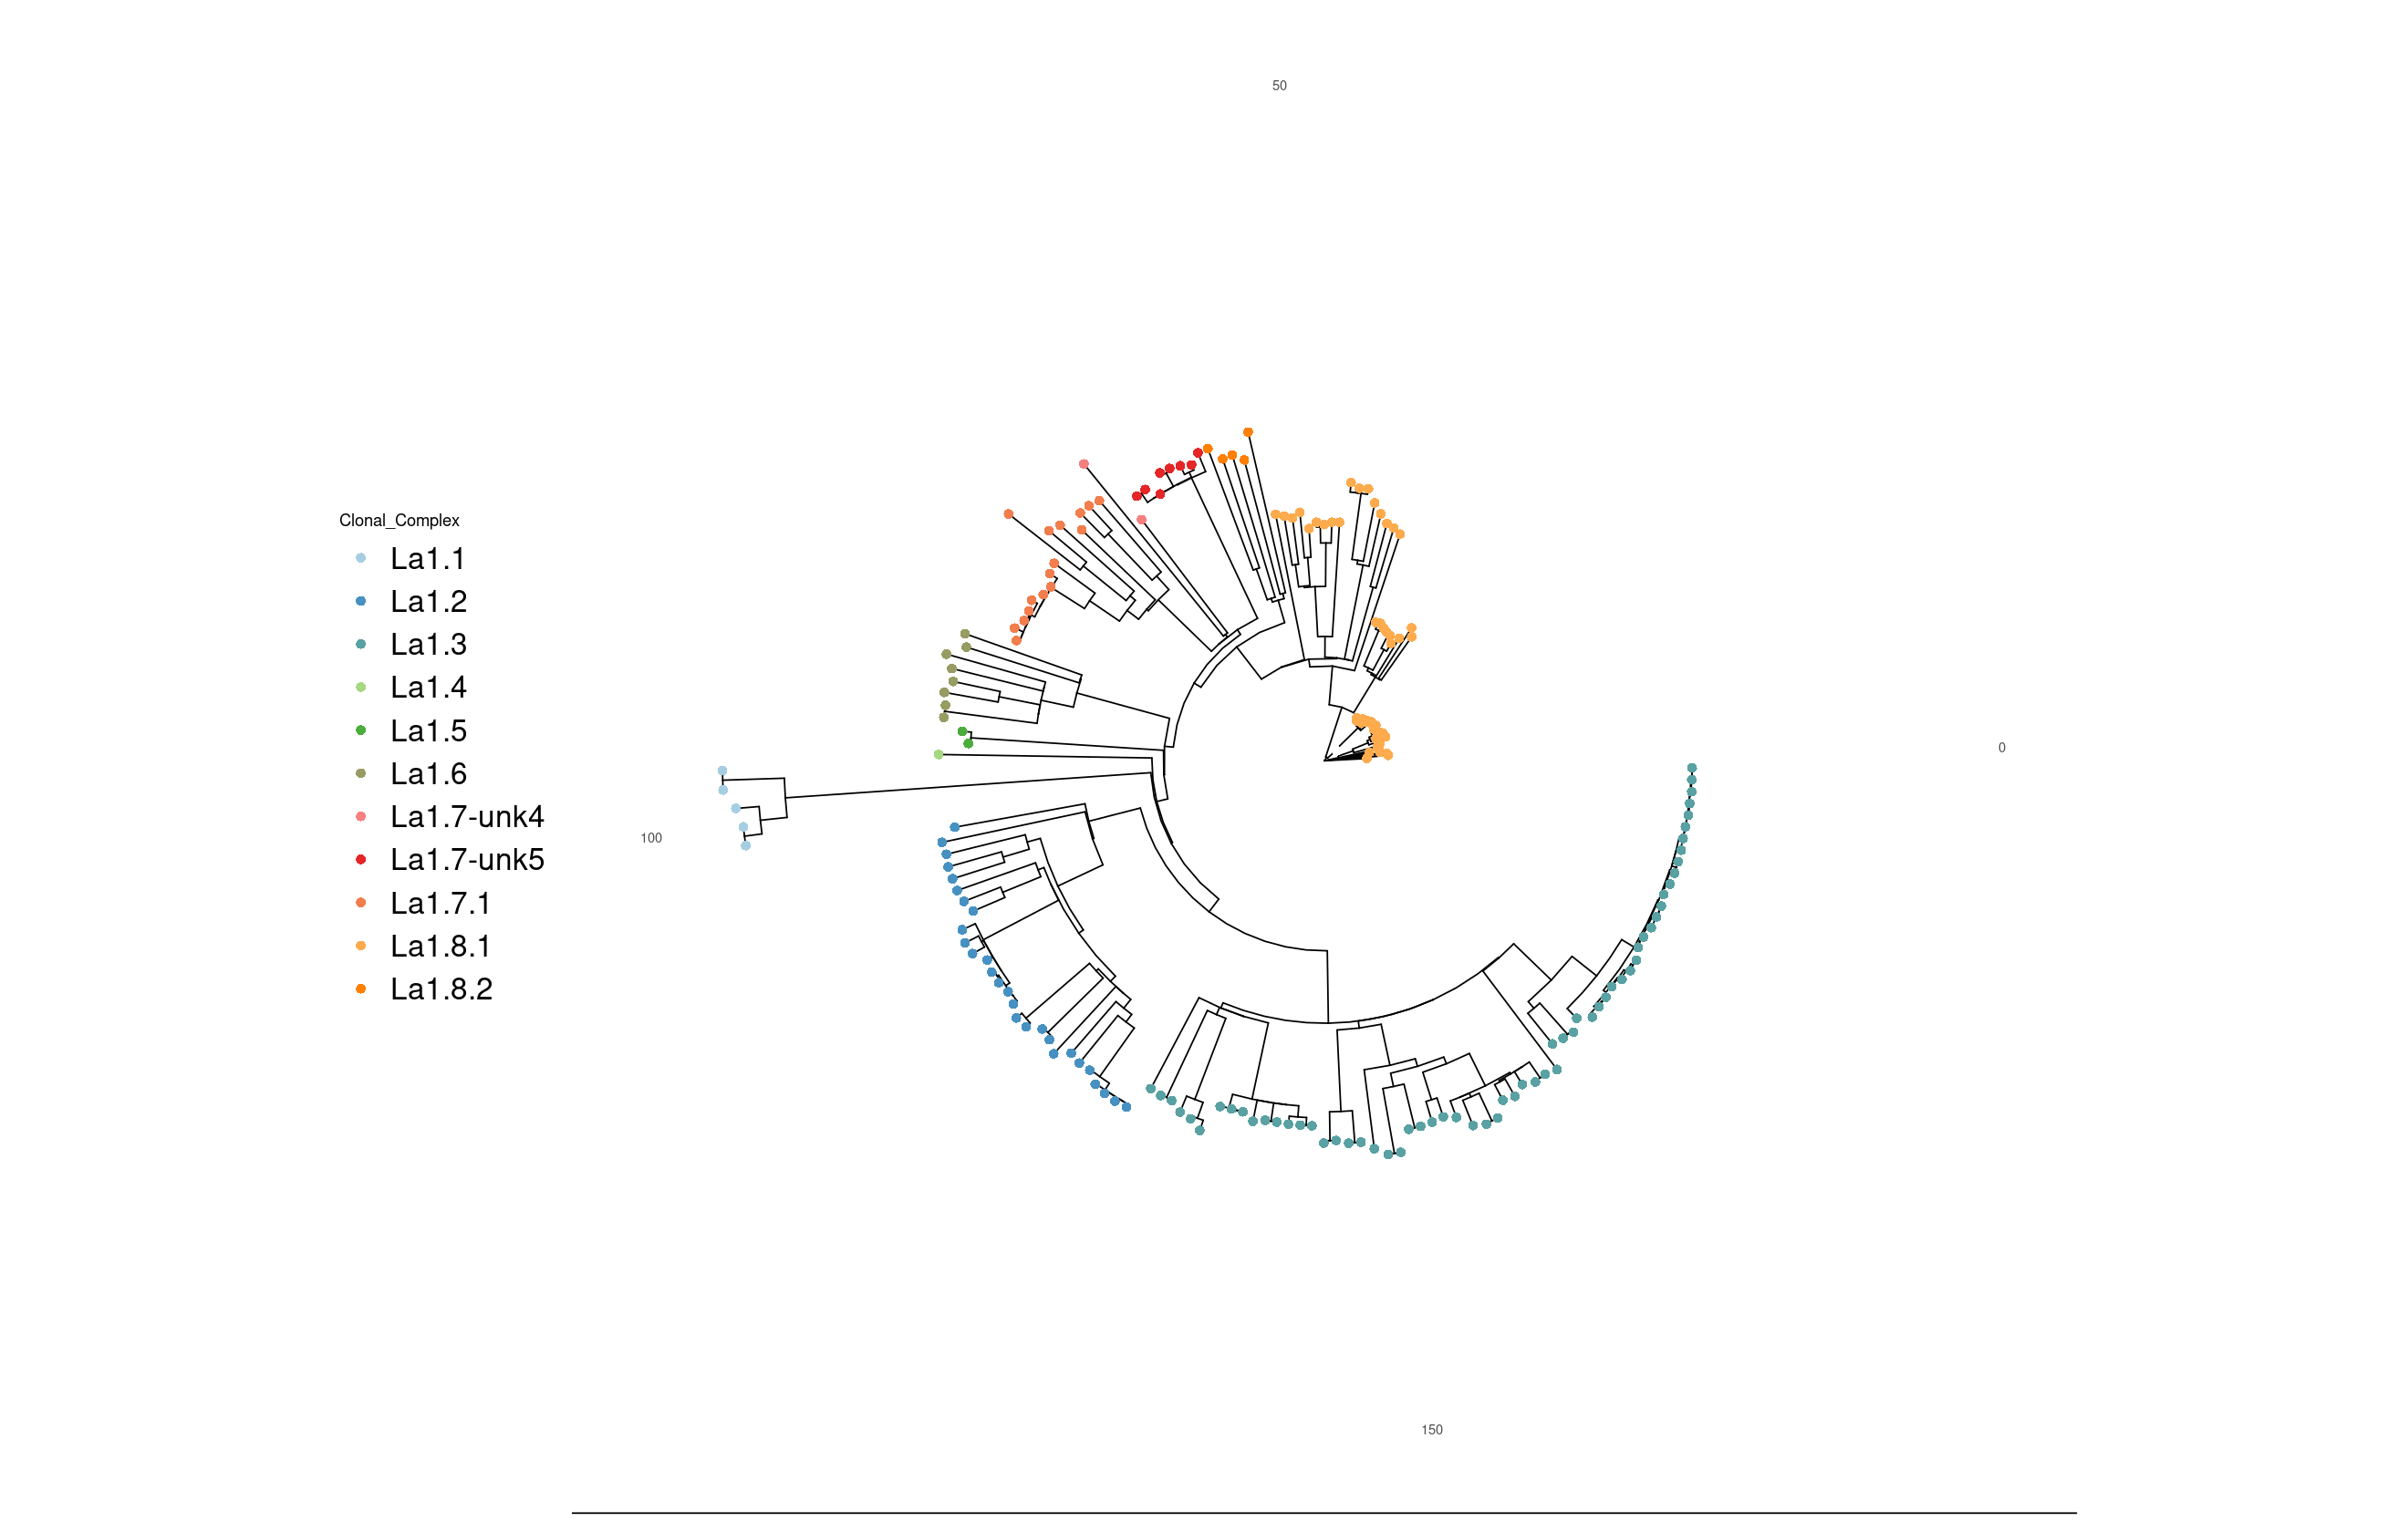

In [29]:
tips<-row.names(meta[(meta$cc %in% c('La2','La3')),])
stree <- drop.tip(gltree, tips)
ggplottree(stree, meta1, layout='c', 'Clonal_Complex','SB', cmap='Paired')

## Ireland

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



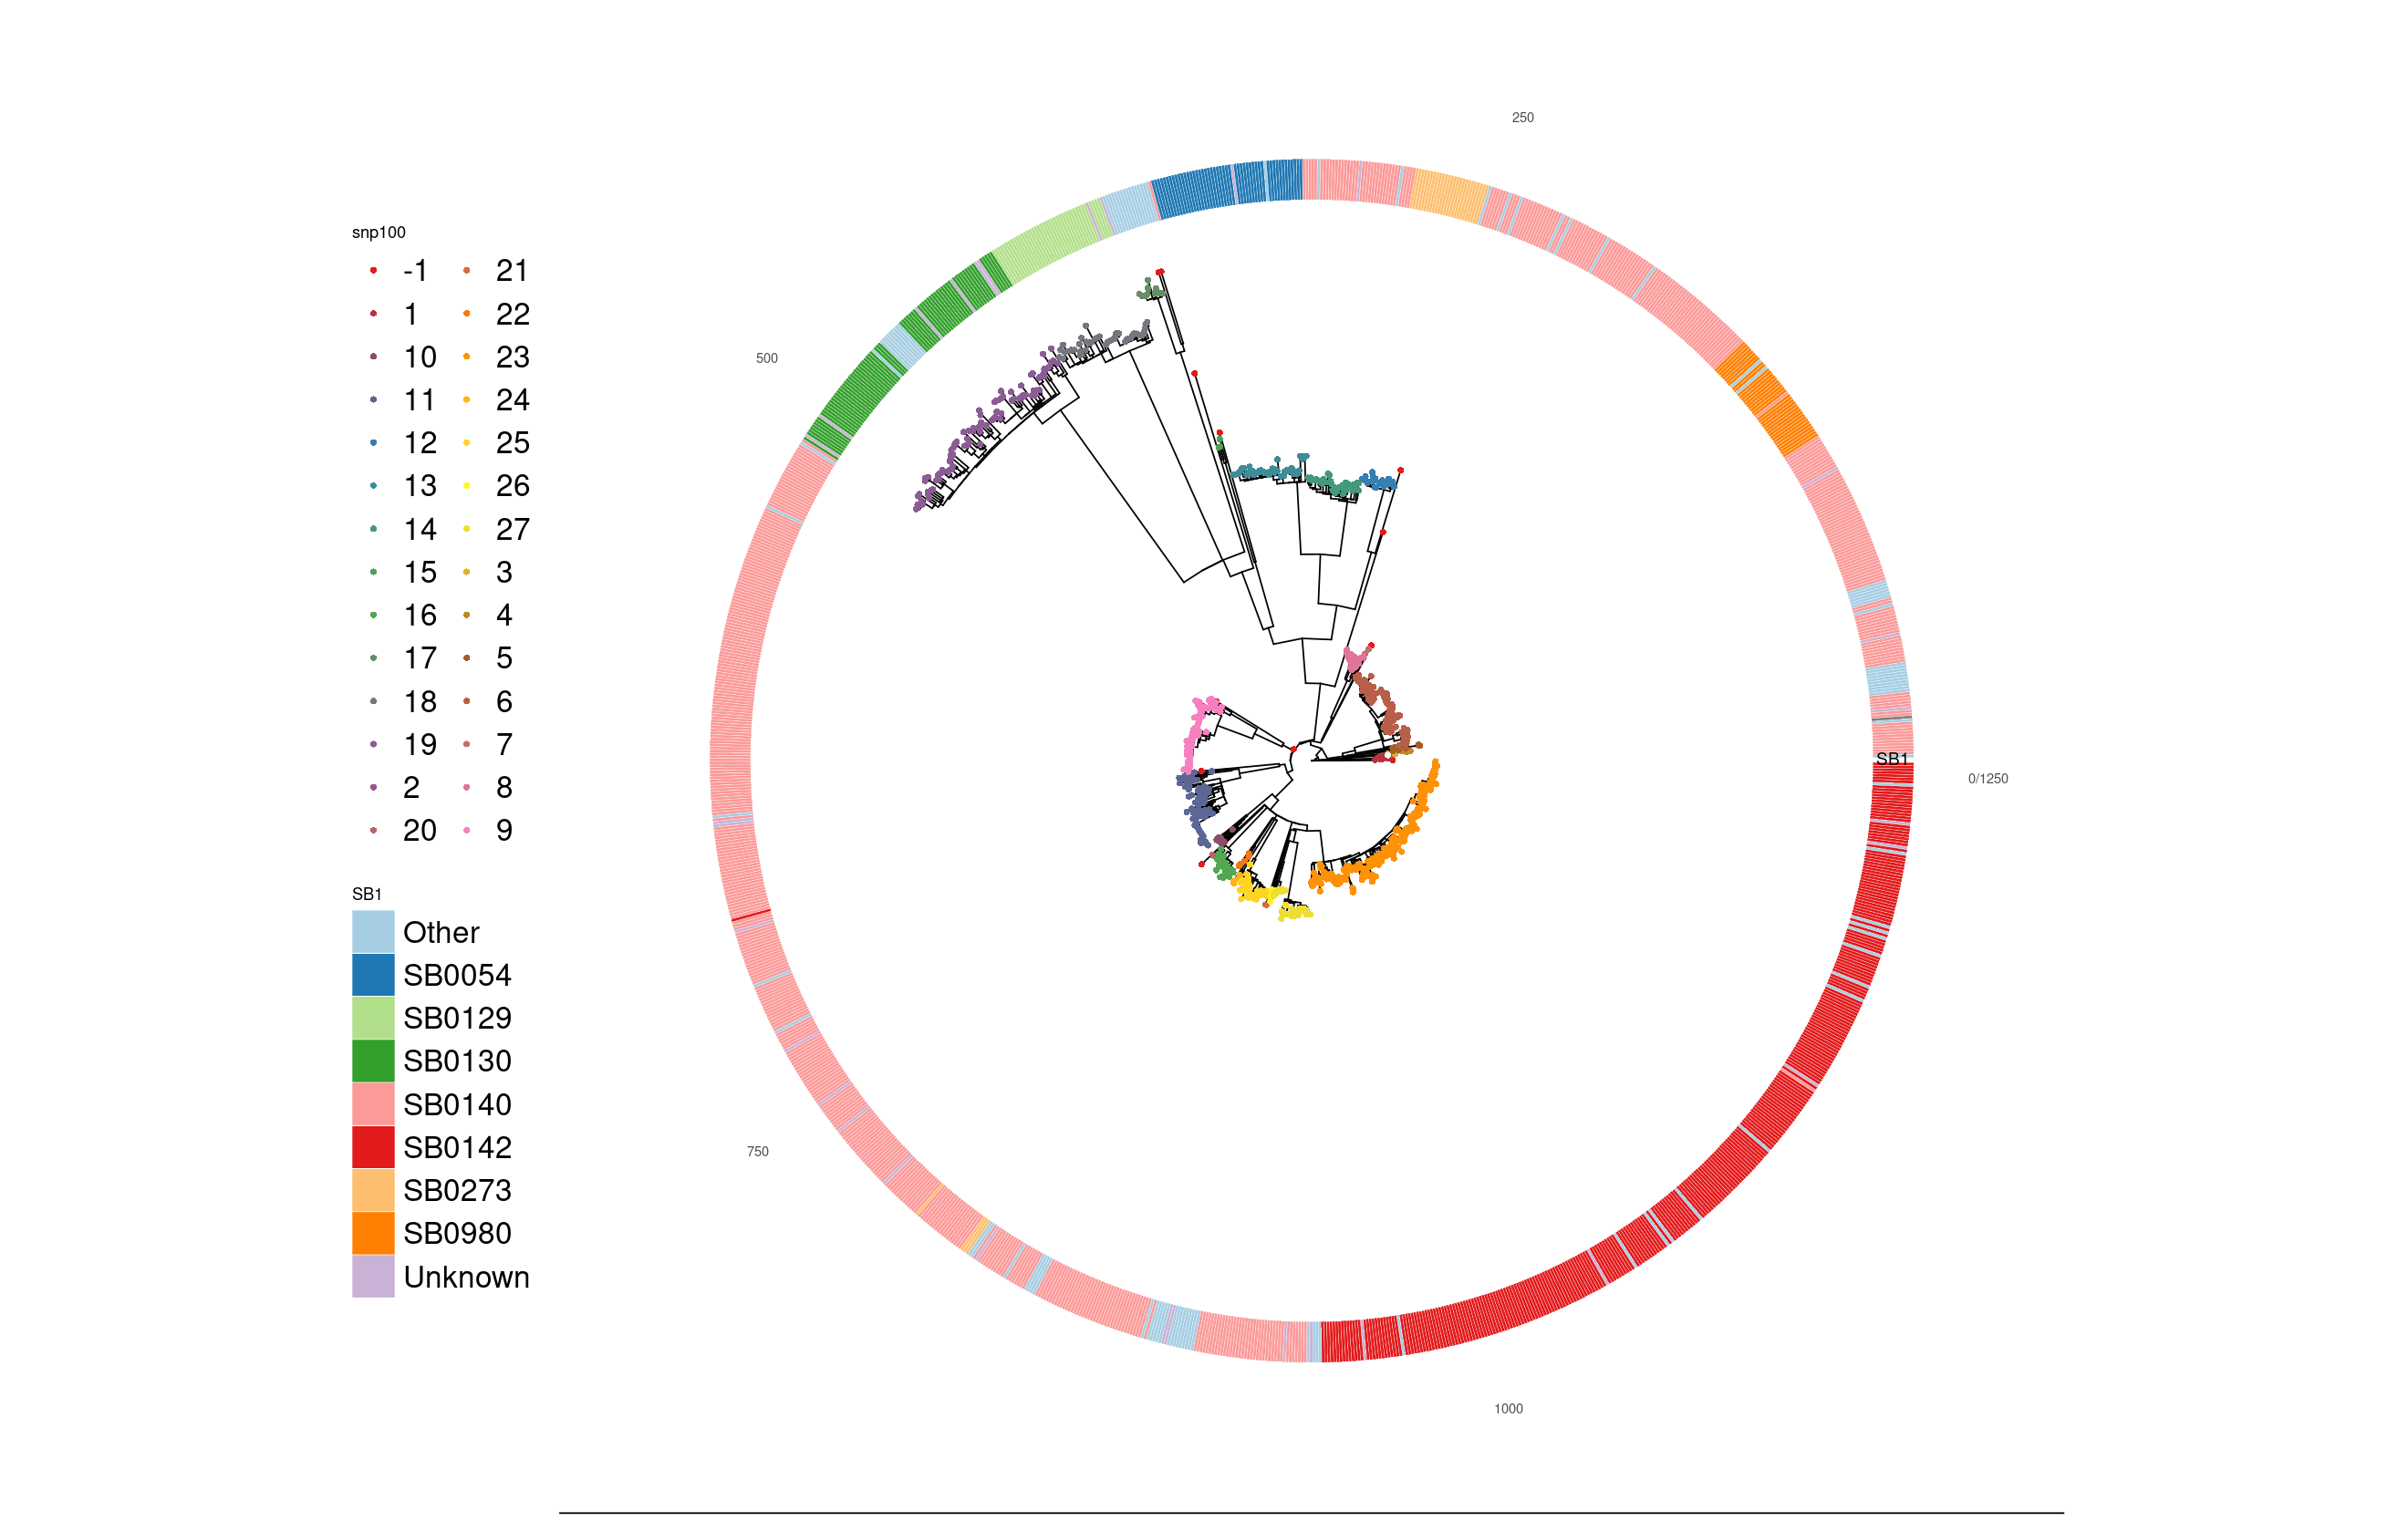

In [22]:
options(repr.plot.width=22, repr.plot.height=14)
tips <- c('TB20-002600','TB20-001797','TB20-002596')
stree <- drop.tip(iretree, tips)
ggplottree(stree,meta2,cols=c('snp100','SB1'),cmaps=c('Set1','Paired'),tipsize=2,layout='circular')

In [ ]:
snp50<-c(8, 7, 13, 38, 34, 24, 27, 12, 30, 42, 39)

tips<-row.names(meta2[meta2$snp50 %in% snp50,])
stree<-keep.tip(iretree,tips)
options(repr.plot.width=22, repr.plot.height=10)
ggplottree(stree,meta2,cols=c('county1','SB1'),cmaps=c('Accent','Set1'),layout='c',tipsize=2,offset=15)
#ggplottree(stree,meta2,'SB',layout='unrooted',cmap='Set1')

In [ ]:
tips<-row.names(meta2[meta2$county %in% c('Monaghan'),])
tips<- c('011-Bov-2000-12.140','018-Bov-2003-18.129','023-Bov-2004-6.263','034-Bov-2004-24.130','112-Bov-2007-19.140','115-Bov-2007-18.129',
         '19-2438','19-4281','378-Bov-2017-11.145','461','TB20-007278','TB20-008269','TB20-010920','TB20-011622')
stree<-keep.tip(iretree,tips)
ggplottree(stree,meta2,'snp50',layout='rect',cmap='Set1',tiplabel=TRUE)

"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.121470511999063

Average angle change [2] 0.0965195242622194

Average angle change [3] 0.0213141475116619



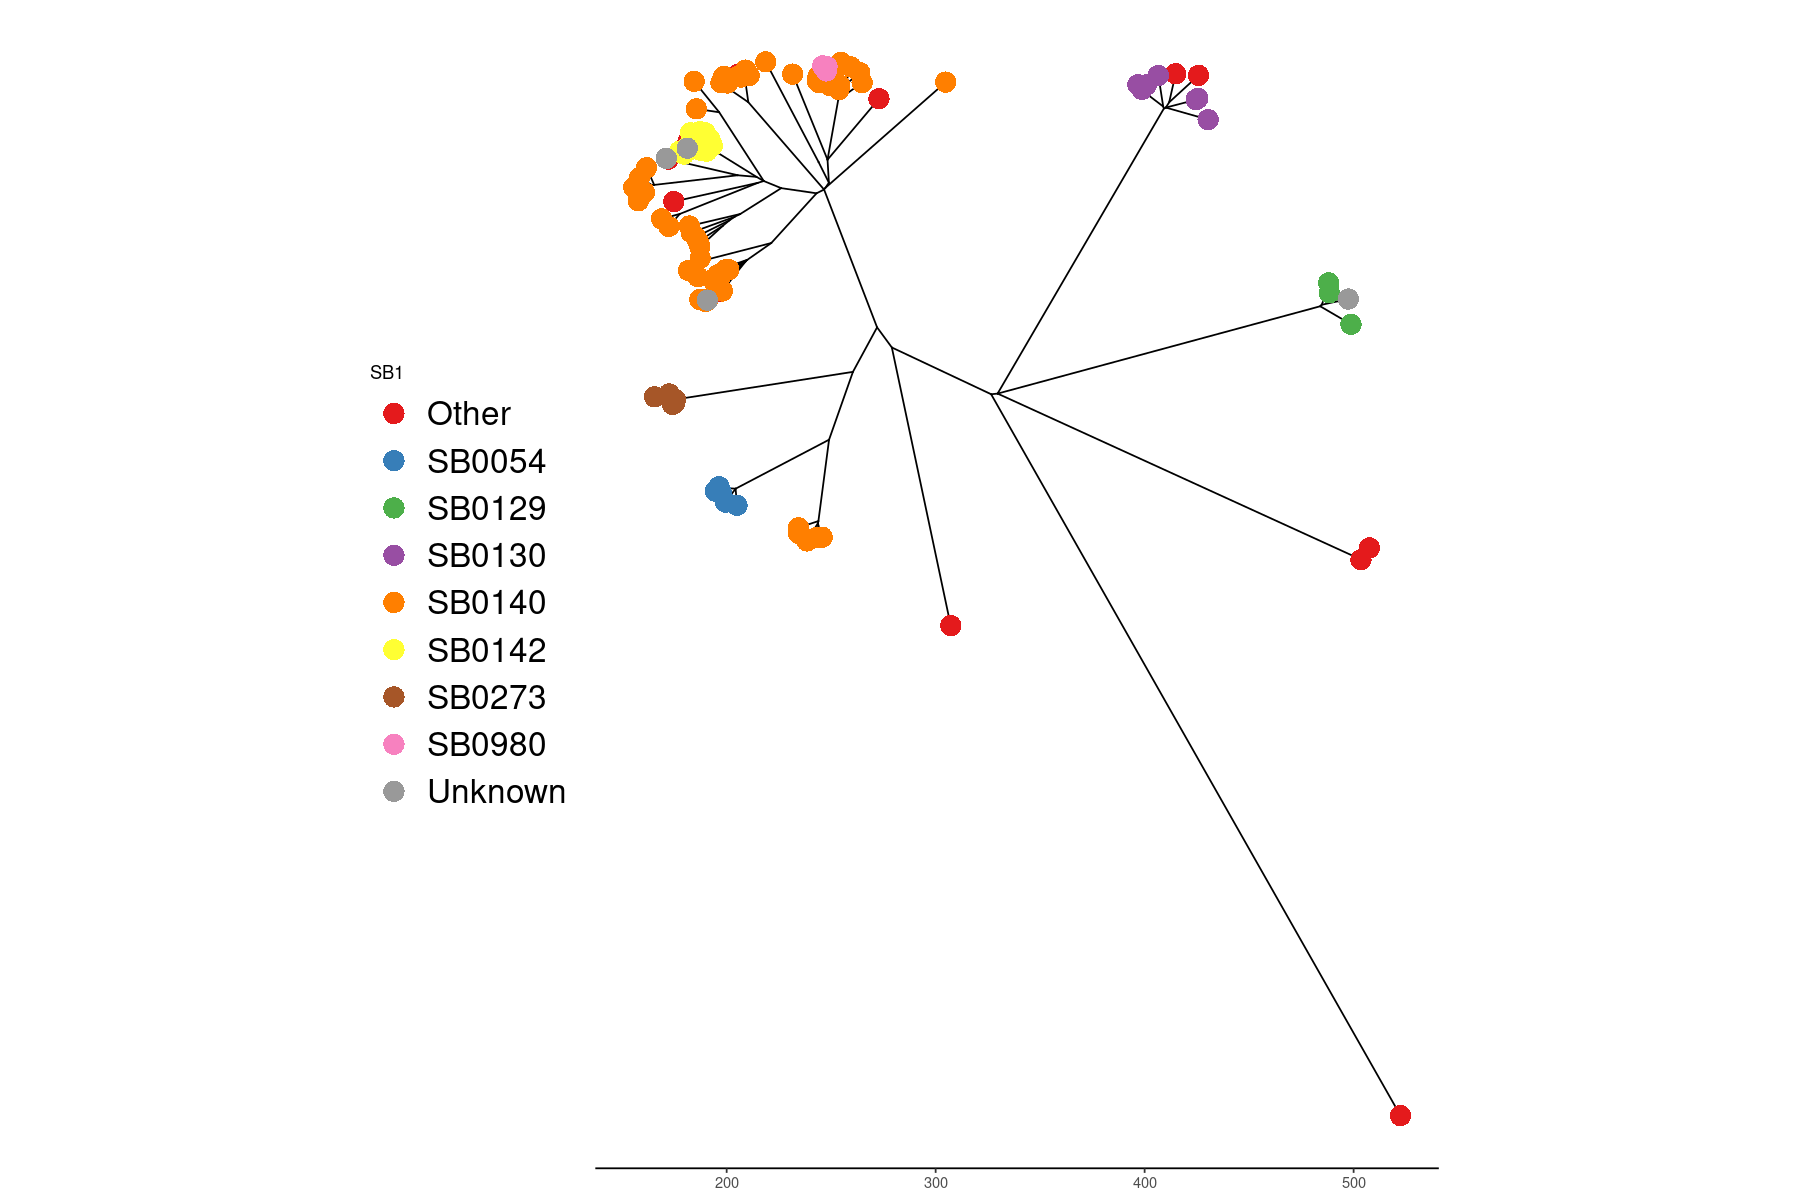

In [24]:
set.seed(10)
randtips<-sample(iretree$tip.label,150)
randtree <- keep.tip(iretree, randtips)
options(repr.plot.width=15, repr.plot.height=10)
p<-ggplottree(randtree, meta2, layout='unrooted','SB1', cmap='Set1', tipsize=6)
#labels <- list(SB0054=10,Monaghan=20)
#labelclades(p, labels)
p

In [24]:
new <- read.table('/storage/btbgenie/monaghan/newclusts.csv',sep=',',
                      header=TRUE,row.names=1)
new[] <- lapply(new, as.character)

"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.11649573356175

Average angle change [2] 0.193541593613698

Average angle change [3] 0.291695564181974

Average angle change [4] 0.246935650830382

Average angle change [5] 0.160749403277446



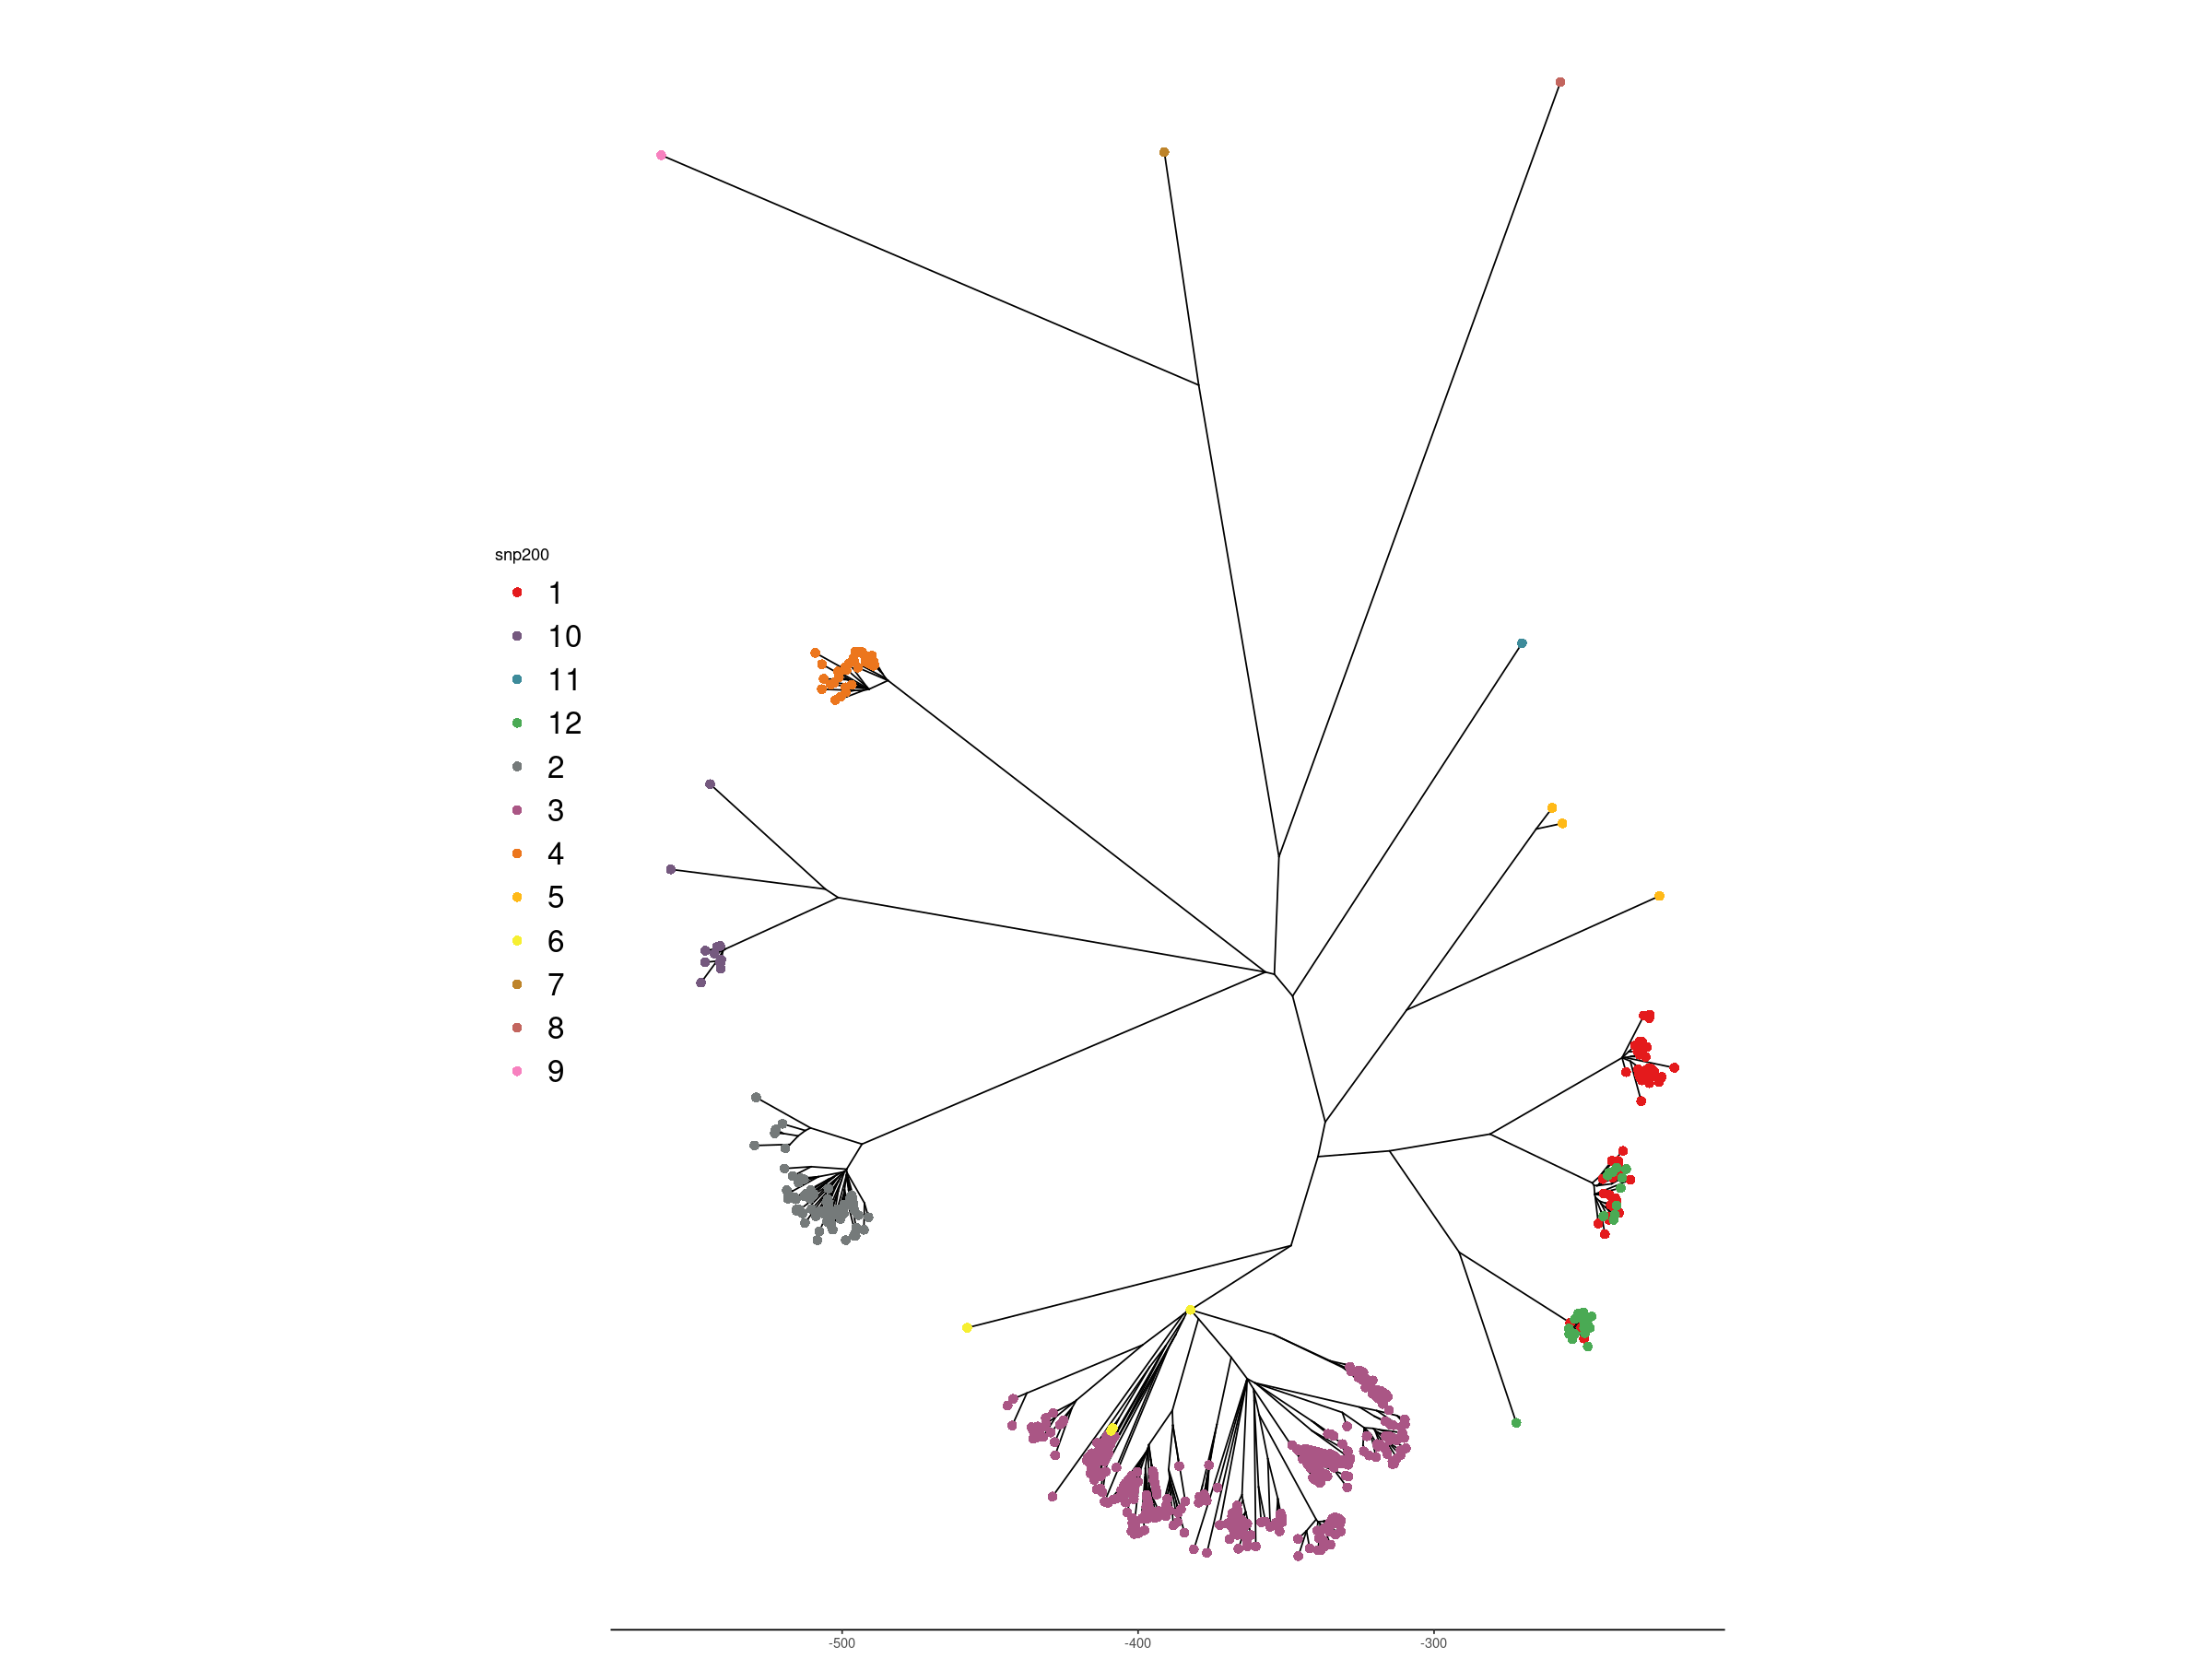

In [27]:
ggplottree(iretree,new,'snp200',layout='circular',cmap='Set1')

## combined, global + Ireland

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
tips<-row.names(meta[(meta$cc %in% c('La2','La3')),])
stree <- drop.tip(mltree, tips)
p<-ggplottree(stree, meta, layout='rect', 'cc','Country1', cmap='Paired')
labels <- list(Wicklow=360,Monaghan=339,NI_Monaghan=321,NI=561)
labelclades(p, labels)

In [ ]:
ggplottree(stree, meta, layout='unrooted', 'cc', cmap='Paired')

In [ ]:
#plot_tree(mltree,meta,column='SB1',cmap='Set1')
p<-ggplottree(mltree, meta, 'county1', 'snp100')
labelclades(p)

In [ ]:
#clustered samples only
snp100cl <- c(4, 5, 9, 8, 18, 15, 6, 7, 33, 37, 32, 28, 20, 42, 29, 17, 22, 13)
snp50cl <- c(19, 7, 21, 34, 25, 46, 56, 49, 9, 65, 28, 33, 43, 47, 12, 24, 14, 40)
snp12cl <- c(36, 72, 35, 46, 21, 38, 37, 52, 39, 16, 51, 82, 74, 22, 19, 73, 60, 8, 48)
tips<-row.names(meta[(meta$snp100 %in% snp100cl),])
itree <- keep.tip(mltree, tips)
ggplottree(subtree, meta, 'county1',  'SB1', layout='rect',cmap='Paired',title='global samples, snp50 clusters')

In [555]:
ggplottree(itree, meta, 'Country', cmap='Spectral', title='global samples, snp100 clusters',layout='unrooted')

"daylight" method was used as default layout for unrooted tree.



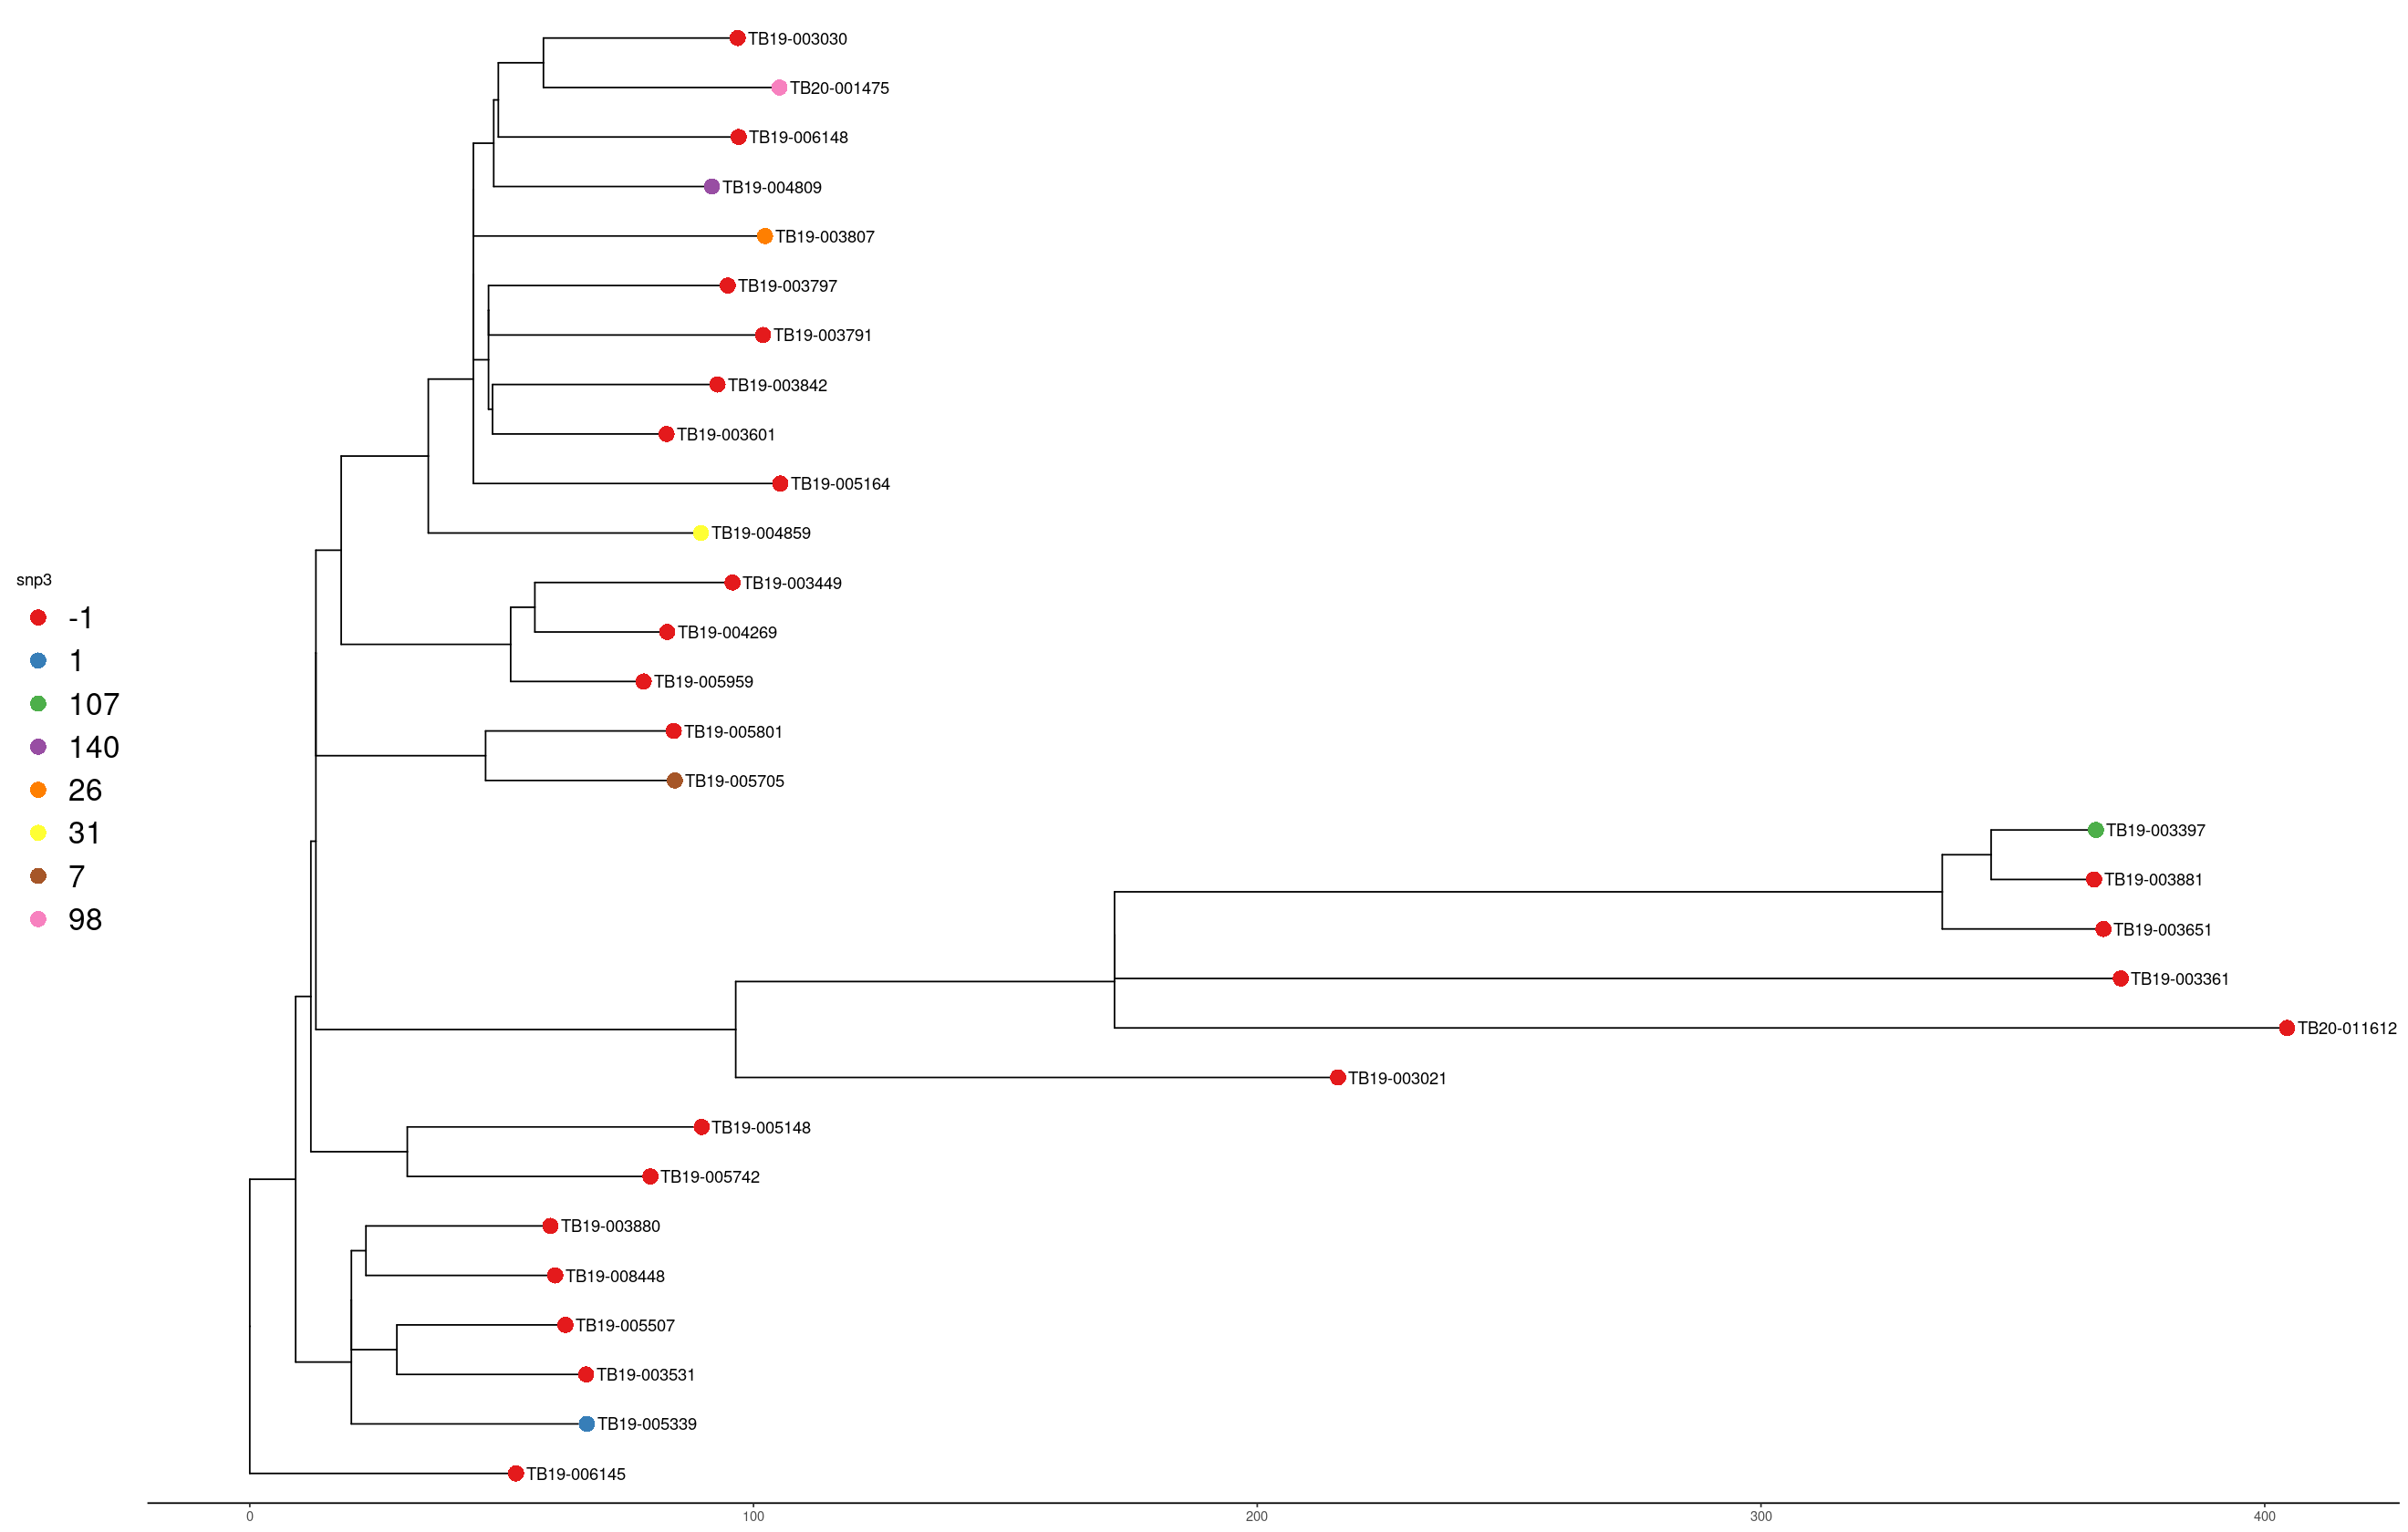

In [45]:
#kevin misc
misctree <- read.tree('/storage/btbgenie/misc_results/tree.newick')
#tips <- c('TB20-002600','TB20-001797','TB20-002596')
tips <- c('TB19-003021', 'TB19-003030', 'TB19-003361', 'TB19-003397', 'TB19-003449', 'TB19-003531', 'TB19-003601', 'TB19-003651', 'TB19-003791', 'TB19-003797', 
          'TB19-003807', 'TB19-003842', 'TB19-003880', 'TB19-003881', 'TB19-004269', 'TB19-004809', 'TB19-004859', 'TB19-005148', 'TB19-005164', 'TB19-005339',
          'TB19-005507', 'TB19-005705', 'TB19-005742', 'TB19-005801', 'TB19-005959', 'TB19-006145', 'TB19-006148', 'TB19-008448', 'TB20-001475', 'TB20-011612')

stree <- keep.tip(misctree, tips)
ggplottree(stree,meta2,'snp3',cmap='Set1',layout='rect',tipsize=5,tiplabel=TRUE)